# CS 4661 Assignment 5


## Part A

In [ ]:
# import libraries and packages

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/05q1/label.csv')

In [ ]:
print(df)

      name of the file  digit label
0                    0            0
1                    1            1
2                    2            2
3                    3            3
4                    4            4
...                ...          ...
1792              1792            9
1793              1793            0
1794              1794            8
1795              1795            9
1796              1796            8

[1797 rows x 2 columns]


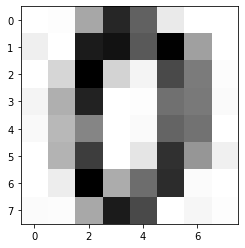

In [ ]:
%matplotlib inline

img = mpimg.imread('gdrive/My Drive/05q1/Digit/Digit/0.jpg')

plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

## Part B

In [ ]:
num_pix = {}

for x in range(1797):
  temp_path = "gdrive/My Drive/05q1/Digit/Digit/" + str(x) + ".jpg"
  temp_img = mpimg.imread(temp_path)
  temp_data = np.array( [np.array(temp_img[i]) for i in range(len(temp_img))] )
  temp_pixels = temp_data.flatten().reshape(64)
  temp_d = dict(enumerate(temp_pixels, 1))
  if x == 0:
    num_pix = pd.DataFrame(temp_d, index=[x])
  else:
    num_pix = num_pix.append(pd.DataFrame(temp_d, index=[x]), ignore_index = True)

In [ ]:
print(num_pix)

      1   2    3    4    5    6   7   8   ...  57  58   59   60   61   62   63  64
0      0   2   88  217  158   21   0   0  ...   4   3   87  228  182    0    9   2
1      0   0   11  187  210   78   5   0  ...   0   0    0  172  251  157    0  12
2      0   0    5   59  240  199   2   0  ...   0  11    0   54  173  255  138   0
3      6   0  108  255  213   13  10   0  ...   0   0  118  217  226  159    0   3
4      0   6    0   34  160    7   7   0  ...   0   0    2   42  250   51    0   4
...   ..  ..  ...  ...  ...  ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ..
1792   5   0   69  160  198  102   6   0  ...   3   1   39  219  246  130   13   0
1793   6   0   96  255  206  164  22   0  ...   9   0   92  246  227   90    0   1
1794   5   0   22  172  242   20   0   0  ...   3   0   27  152  211   87   21   0
1795   7   0   22  158  114    0   8   2  ...  12   0   83  185  255  196    0   7
1796   0  17  155  236  123   20   0   4  ...   0  17  137  184  214  198   26   0

[17

## Part C

In [ ]:
num_copy = num_pix.copy()

final_df = pd.concat([num_copy,df], axis=1)

print(final_df)

      1   2    3    4    5  ...   62   63  64  name of the file  digit label
0     0   2   88  217  158  ...    0    9   2                 0            0
1     0   0   11  187  210  ...  157    0  12                 1            1
2     0   0    5   59  240  ...  255  138   0                 2            2
3     6   0  108  255  213  ...  159    0   3                 3            3
4     0   6    0   34  160  ...   51    0   4                 4            4
...  ..  ..  ...  ...  ...  ...  ...  ...  ..               ...          ...
1792  5   0   69  160  198  ...  130   13   0              1792            9
1793  6   0   96  255  206  ...   90    0   1              1793            0
1794  5   0   22  172  242  ...   87   21   0              1794            8
1795  7   0   22  158  114  ...  196    0   7              1795            9
1796  0  17  155  236  123  ...  198   26   0              1796            8

[1797 rows x 66 columns]


In [ ]:
feature_cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]

X = final_df[feature_cols]
y = final_df['digit label']

In [ ]:
# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(1617, 64)
(1617,)
(180, 64)
(180,)


## Part D

In [ ]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

my_RandomForest.fit(X_train, y_train)

y_predict_lr_forest = my_RandomForest.predict(X_test)

#Calculate Accuracy
score_lr_three = accuracy_score(y_test, y_predict_lr_forest)

print("Accuracy of Random Forest Classifier: ", score_lr_three)

Accuracy of Random Forest Classifier:  0.9277777777777778


## Part E

*edit

this is part of my new submission. if i am allowed to submit this a little late i hope that is okay. thank you!

i realized i was using x_test instead of y_test and was confused until realizing my mistake

In [ ]:
a_final = y_test.copy()

In [ ]:
int_a = 0
for x in range(len(y_test)):
  if y_test.iloc[x] == y_predict_lr_forest[x]:
    temp_ind = y_test.index[x]
    a_final = a_final.drop(temp_ind)

In [ ]:
img_ar = []

for x in range(len(a_final)):
  temp_path = "gdrive/My Drive/05q1/Digit/Digit/" + str(a_final.index[x]) + ".jpg"
  temp_img = mpimg.imread(temp_path)
  img_ar.append(temp_img)
  #plt.imshow(temp_img, cmap=plt.cm.gray_r, interpolation='nearest')

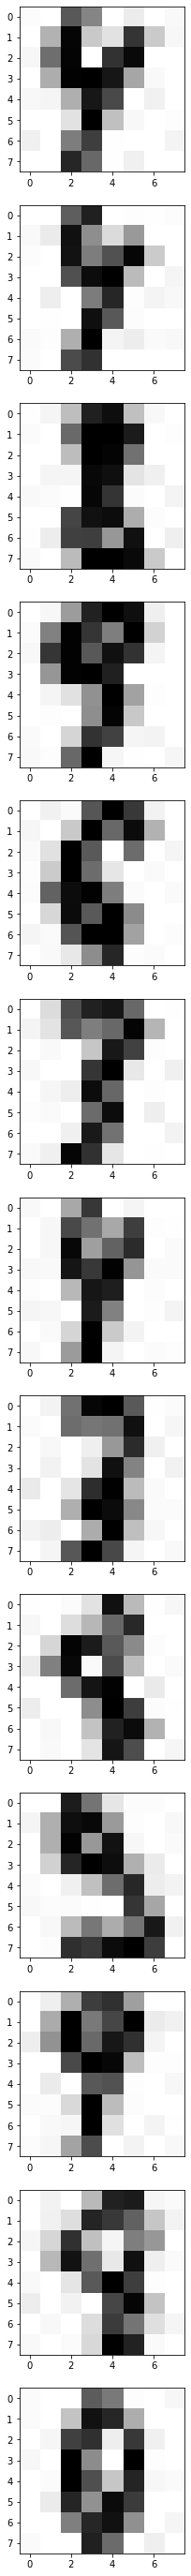

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(50, 50))

for x in range(len(img_ar)):
  sub = fig.add_subplot(len(img_ar), 1, x + 1)
  sub.imshow(img_ar[x], cmap=plt.cm.gray_r, interpolation='nearest')